In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from prettytable import PrettyTable 
import missingno as msno
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import dill

In [4]:
dill.load_session('notebookk1to2.db')

In [21]:
df_complete=pd.read_csv("cardio-complete.csv",delimiter=",")

In [22]:
df_complete.head()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,66667,20252,Women,161,62.0,140,90,High,High,0,0,1,1
1,22956,21129,Men,166,66.0,125,70,Normal,Normal,1,0,1,0
2,40536,16602,Men,160,74.0,140,90,Normal,Normal,0,0,1,0
3,39712,15172,Men,167,77.0,120,80,Normal,Normal,0,0,1,0
4,82165,19858,Women,176,93.0,140,90,Above Normal,Normal,0,1,1,1


In [23]:
df_complete['cholesterol'].value_counts()

Normal          755
High            131
Above Normal    114
Name: cholesterol, dtype: int64

In [24]:
df_complete['cholesterol']=df_complete['cholesterol'].map({'Normal':1,'High':3,'Above Normal':2},na_action=None)
df_complete['cholesterol'].value_counts()

1    755
3    131
2    114
Name: cholesterol, dtype: int64

In [25]:
print(df_complete['gluc'].value_counts())
df_complete['gluc']=df_complete['gluc'].map({'Normal':1,'High':3,'Above Normal':2},na_action=None)
print(df_complete['gluc'].value_counts())

Normal          853
High             87
Above Normal     60
Name: gluc, dtype: int64
1    853
3     87
2     60
Name: gluc, dtype: int64


In [26]:
print(df_complete['gender'].value_counts())
df_complete['gender']=df_complete['gender'].map({'Men':1,'Women':2},na_action=None)
print(df_complete['gender'].value_counts())

Men      664
Women    336
Name: gender, dtype: int64
1    664
2    336
Name: gender, dtype: int64


In [27]:
df_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           1000 non-null   int64  
 1   age          1000 non-null   int64  
 2   gender       1000 non-null   int64  
 3   height       1000 non-null   int64  
 4   weight       1000 non-null   float64
 5   ap_hi        1000 non-null   int64  
 6   ap_lo        1000 non-null   int64  
 7   cholesterol  1000 non-null   int64  
 8   gluc         1000 non-null   int64  
 9   smoke        1000 non-null   int64  
 10  alco         1000 non-null   int64  
 11  active       1000 non-null   int64  
 12  cardio       1000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 101.7 KB


In [28]:
Y=df_complete['cardio']

In [29]:
X=df_complete.drop(columns=['id','cardio'])

In [30]:
X.shape

(1000, 11)

In [31]:
Y.shape

(1000,)

In [32]:
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, Y, test_size=0.33)

In [37]:
X_train_c.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
135,20583,1,162,67.0,120,80,1,1,0,0,1
266,18295,1,156,62.0,110,70,1,1,0,0,1
495,21090,1,152,65.0,150,80,2,1,0,0,1
716,19734,2,175,85.0,120,80,1,1,0,0,1
745,14541,1,157,75.0,100,60,1,1,0,0,1


### Scaling 

In [38]:
X_train_c_std=X_train_c.copy(deep=True)
X_test_c_std=X_test_c.copy(deep=True)

In [39]:
sc=StandardScaler()
X_train_c_std=sc.fit_transform(X_train_c_std)
X_test_c_std=sc.fit_transform(X_test_c_std)

In [42]:
X_train_c_std=pd.DataFrame(X_train_c_std,columns=X_train_c.columns)
X_test_c_std=pd.DataFrame(X_test_c_std,columns=X_test_c.columns)

In [45]:
X_train_c_minmax=X_train_c.copy(deep=True)
X_test_c_minmax=X_test_c.copy(deep=True)
sc=MinMaxScaler()
X_train_c_minmax=sc.fit_transform(X_train_c_minmax)
X_test_c_minmax=sc.fit_transform(X_test_c_minmax)
X_train_c_minmax=pd.DataFrame(X_train_c_minmax,columns=X_train_c.columns)
df_test_ranna_minmaxsc=pd.DataFrame(X_train_c_minmax,columns=X_test_c.columns)

### Std scaled l1 Reg Logistic Regression 

model=LogisticRegression(C=0.0001, penalty='l1', solver='liblinear')


accuracy = 0.47878787878787876
f1 score=0.0
Precission=0.0
Recall=0.0


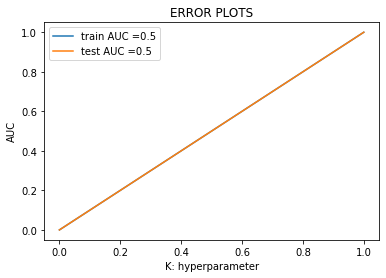

Train confusion matrix
[[332   0]
 [338   0]]
Test confusion matrix
[[158   0]
 [172   0]]


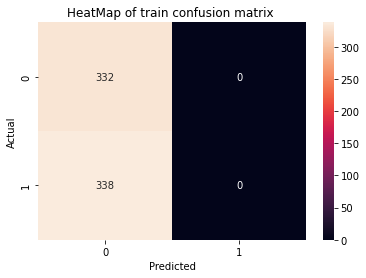

***********************************
model=LogisticRegression(C=0.001, penalty='l1', solver='liblinear')


accuracy = 0.47878787878787876
f1 score=0.0
Precission=0.0
Recall=0.0


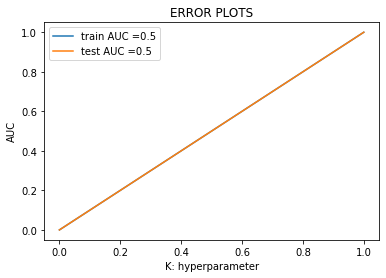

Train confusion matrix
[[332   0]
 [338   0]]
Test confusion matrix
[[158   0]
 [172   0]]


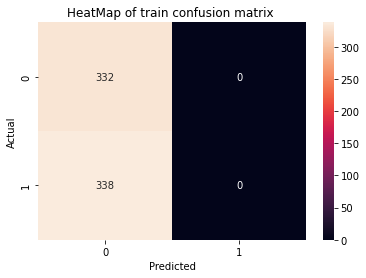

***********************************
model=LogisticRegression(C=0.01, penalty='l1', solver='liblinear')


accuracy = 0.6787878787878788
f1 score=0.6490066225165563
Precission=0.7538461538461538
Recall=0.5697674418604651


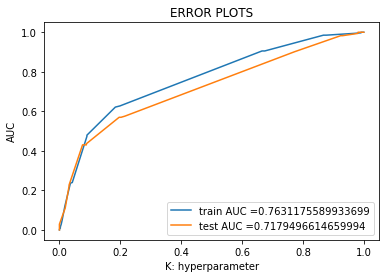

Train confusion matrix
[[271  61]
 [128 210]]
Test confusion matrix
[[126  32]
 [ 74  98]]


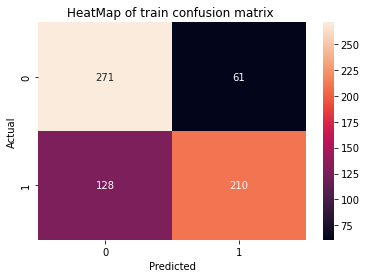

***********************************
model=LogisticRegression(C=0.1, penalty='l1', solver='liblinear')


accuracy = 0.693939393939394
f1 score=0.6731391585760518
Precission=0.7591240875912408
Recall=0.6046511627906976


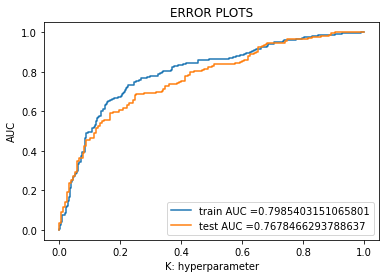

Train confusion matrix
[[271  61]
 [113 225]]
Test confusion matrix
[[125  33]
 [ 68 104]]


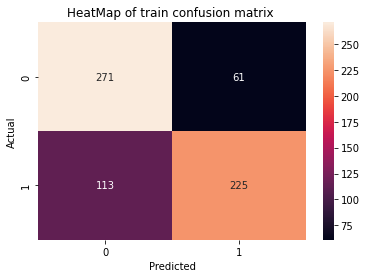

***********************************
model=LogisticRegression(C=1, penalty='l1', solver='liblinear')


accuracy = 0.7
f1 score=0.6837060702875398
Precission=0.7588652482269503
Recall=0.622093023255814


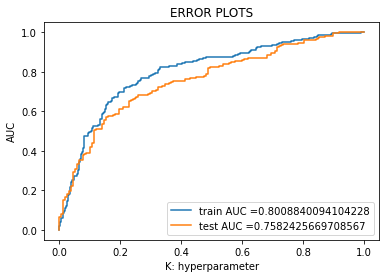

Train confusion matrix
[[268  64]
 [105 233]]
Test confusion matrix
[[124  34]
 [ 65 107]]


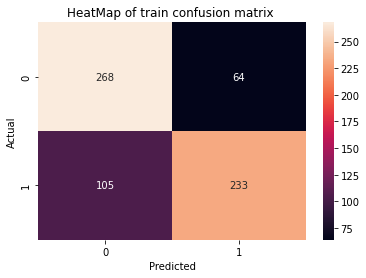

***********************************
model=LogisticRegression(C=10, penalty='l1', solver='liblinear')


accuracy = 0.6848484848484848
f1 score=0.664516129032258
Precission=0.7463768115942029
Recall=0.5988372093023255


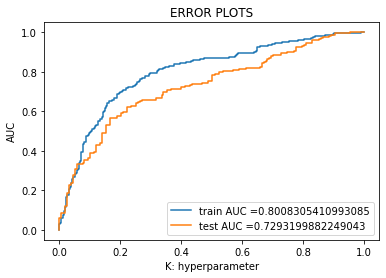

Train confusion matrix
[[267  65]
 [105 233]]
Test confusion matrix
[[123  35]
 [ 69 103]]


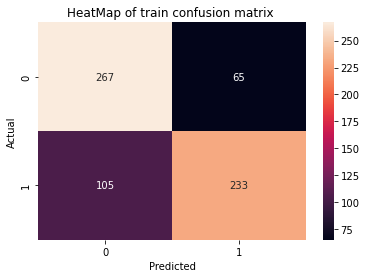

***********************************
model=LogisticRegression(C=100, penalty='l1', solver='liblinear')


accuracy = 0.6787878787878788
f1 score=0.6602564102564102
Precission=0.7357142857142858
Recall=0.5988372093023255


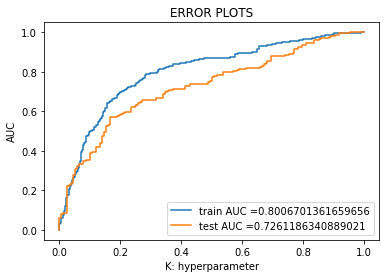

Train confusion matrix
[[267  65]
 [104 234]]
Test confusion matrix
[[121  37]
 [ 69 103]]


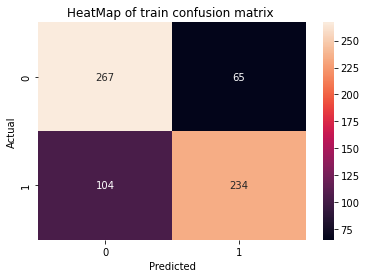

***********************************
model=LogisticRegression(C=1000, penalty='l1', solver='liblinear')


accuracy = 0.6787878787878788
f1 score=0.6602564102564102
Precission=0.7357142857142858
Recall=0.5988372093023255


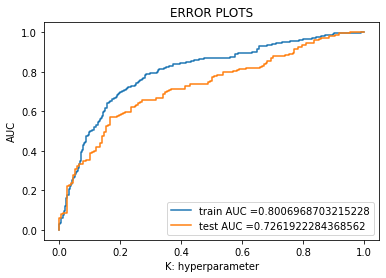

Train confusion matrix
[[267  65]
 [104 234]]
Test confusion matrix
[[121  37]
 [ 69 103]]


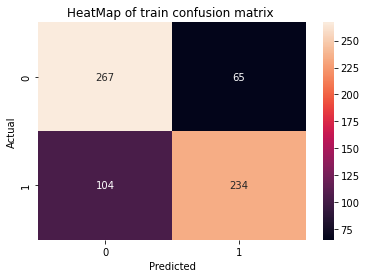

***********************************
model=LogisticRegression(C=10000, penalty='l1', solver='liblinear')


accuracy = 0.6787878787878788
f1 score=0.6602564102564102
Precission=0.7357142857142858
Recall=0.5988372093023255


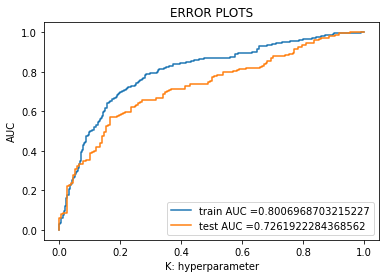

Train confusion matrix
[[267  65]
 [104 234]]
Test confusion matrix
[[121  37]
 [ 69 103]]


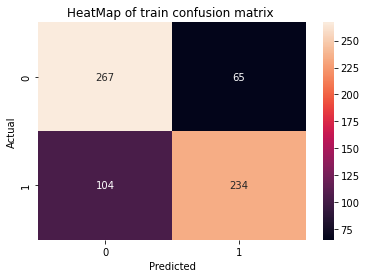

***********************************


In [49]:
Cs=[0.0001, 0.001, 0.01, 0.1, 1, 10, 100,1000,10000]
for c in Cs:
    lr = LogisticRegression(penalty='l1',solver='liblinear',C=c)
    lr.fit(X_train_c_std, y_train_c)
    ypred=lr.predict(X_test_c_std)
    print("model={}".format(lr))
    print("\n")
    print("accuracy = {}".format(accuracy_score(y_test_c, ypred)))
    print("f1 score={}".format(f1_score(y_test_c, ypred)))
    print("Precission={}".format(precision_score(y_test_c, ypred)))
    print("Recall={}".format(recall_score(y_test_c, ypred)))
        
    train_fpr, train_tpr, thresholds = roc_curve(y_train_c,lr.predict_proba(X_train_c_std)[:,1])
    test_fpr, test_tpr, thresholds = roc_curve(y_test_c,lr.predict_proba(X_test_c_std)[:,1])

    plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
    plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
    plt.legend()
    plt.xlabel("K: hyperparameter")
    plt.ylabel("AUC")
    plt.title("ERROR PLOTS")
    plt.show()

    print("Train confusion matrix")
    x=confusion_matrix(y_train_c, lr.predict(X_train_c_std))
    y=confusion_matrix(y_test_c, lr.predict(X_test_c_std))
    print(x)
    print("Test confusion matrix")
    print(y)
    ax = plt.axes()
    sns.heatmap(x, ax = ax,annot=True, fmt="d")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    ax.set_title("HeatMap of train confusion matrix ")
    plt.show()
    print("***********************************")
    


### Std scaled l2 Reg Logistic Regression 

model=LogisticRegression(C=0.0001)


accuracy = 0.6484848484848484
f1 score=0.7302325581395348
Precission=0.6085271317829457
Recall=0.9127906976744186


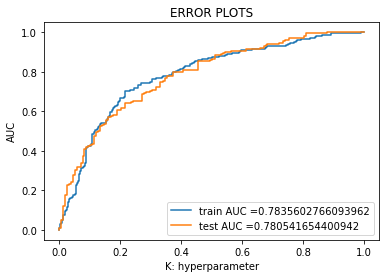

Train confusion matrix
[[125 207]
 [ 30 308]]
Test confusion matrix
[[ 57 101]
 [ 15 157]]


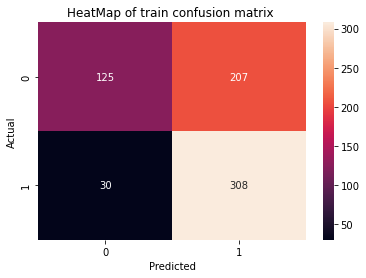

***********************************
model=LogisticRegression(C=0.001)


accuracy = 0.693939393939394
f1 score=0.6873065015479877
Precission=0.7350993377483444
Recall=0.6453488372093024


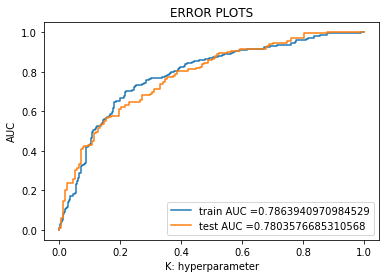

Train confusion matrix
[[260  72]
 [105 233]]
Test confusion matrix
[[118  40]
 [ 61 111]]


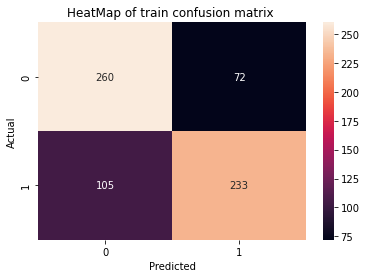

***********************************
model=LogisticRegression(C=0.01)


accuracy = 0.706060606060606
f1 score=0.6959247648902821
Precission=0.7551020408163265
Recall=0.6453488372093024


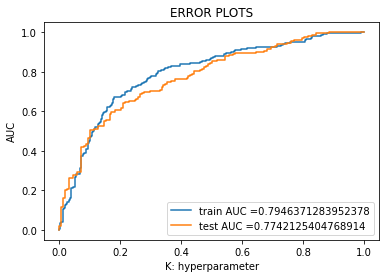

Train confusion matrix
[[262  70]
 [107 231]]
Test confusion matrix
[[122  36]
 [ 61 111]]


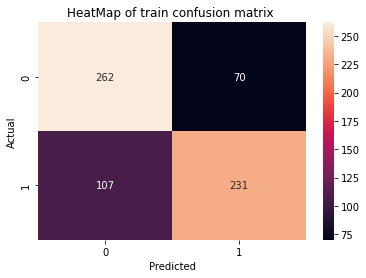

***********************************
model=LogisticRegression(C=0.1)


accuracy = 0.7
f1 score=0.6876971608832807
Precission=0.7517241379310344
Recall=0.6337209302325582


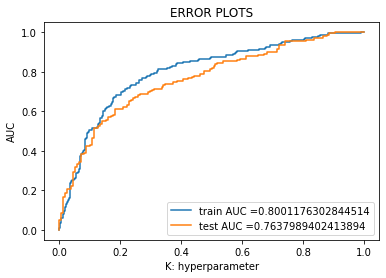

Train confusion matrix
[[267  65]
 [107 231]]
Test confusion matrix
[[122  36]
 [ 63 109]]


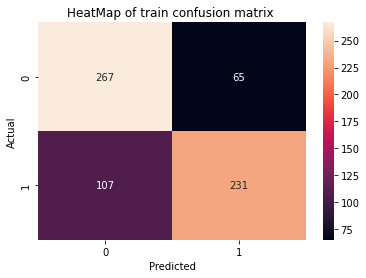

***********************************
model=LogisticRegression(C=1)


accuracy = 0.7
f1 score=0.6857142857142857
Precission=0.7552447552447552
Recall=0.627906976744186


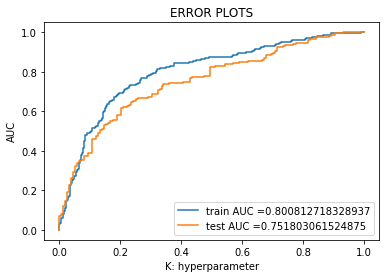

Train confusion matrix
[[268  64]
 [106 232]]
Test confusion matrix
[[123  35]
 [ 64 108]]


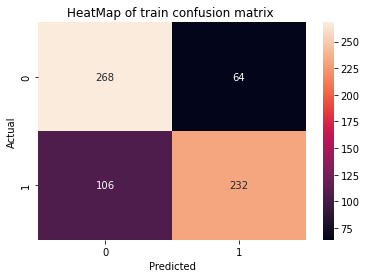

***********************************
model=LogisticRegression(C=10)


accuracy = 0.6848484848484848
f1 score=0.664516129032258
Precission=0.7463768115942029
Recall=0.5988372093023255


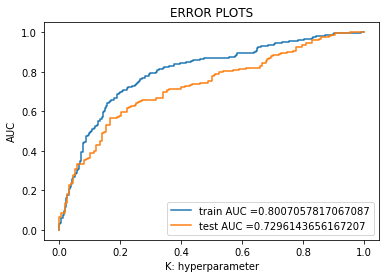

Train confusion matrix
[[267  65]
 [104 234]]
Test confusion matrix
[[123  35]
 [ 69 103]]


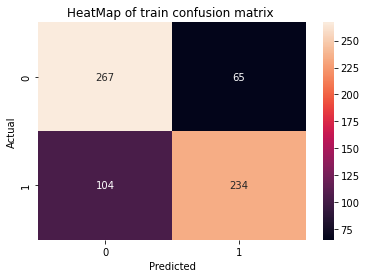

***********************************
model=LogisticRegression(C=100)


accuracy = 0.6787878787878788
f1 score=0.6602564102564102
Precission=0.7357142857142858
Recall=0.5988372093023255


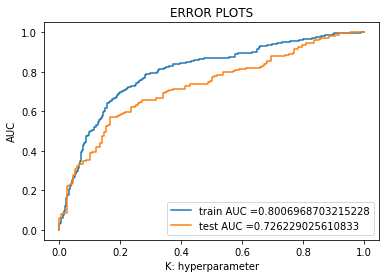

Train confusion matrix
[[267  65]
 [104 234]]
Test confusion matrix
[[121  37]
 [ 69 103]]


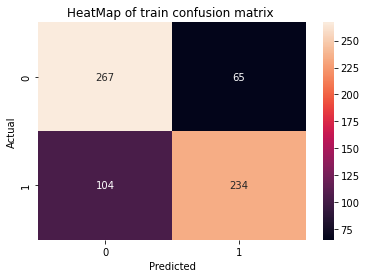

***********************************
model=LogisticRegression(C=1000)


accuracy = 0.6787878787878788
f1 score=0.6602564102564102
Precission=0.7357142857142858
Recall=0.5988372093023255


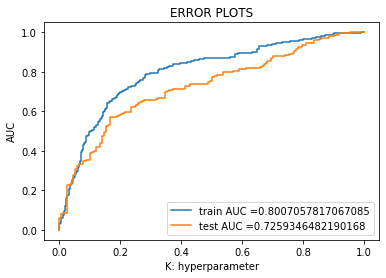

Train confusion matrix
[[267  65]
 [104 234]]
Test confusion matrix
[[121  37]
 [ 69 103]]


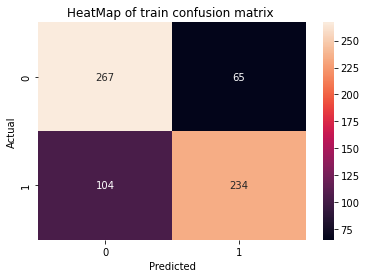

***********************************
model=LogisticRegression(C=10000)


accuracy = 0.6787878787878788
f1 score=0.6602564102564102
Precission=0.7357142857142858
Recall=0.5988372093023255


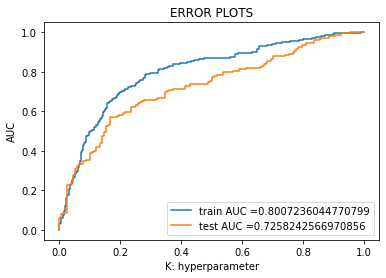

Train confusion matrix
[[267  65]
 [104 234]]
Test confusion matrix
[[121  37]
 [ 69 103]]


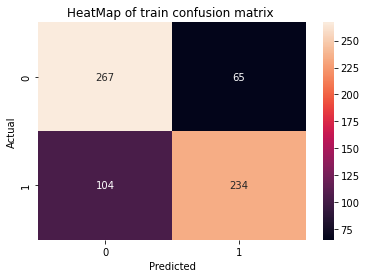

***********************************


In [50]:
Cs=[0.0001, 0.001, 0.01, 0.1, 1, 10, 100,1000,10000]
for c in Cs:
    lr = LogisticRegression(penalty='l2',C=c)
    lr.fit(X_train_c_std, y_train_c)
    ypred=lr.predict(X_test_c_std)
    print("model={}".format(lr))
    print("\n")
    print("accuracy = {}".format(accuracy_score(y_test_c, ypred)))
    print("f1 score={}".format(f1_score(y_test_c, ypred)))
    print("Precission={}".format(precision_score(y_test_c, ypred)))
    print("Recall={}".format(recall_score(y_test_c, ypred)))
        
    train_fpr, train_tpr, thresholds = roc_curve(y_train_c,lr.predict_proba(X_train_c_std)[:,1])
    test_fpr, test_tpr, thresholds = roc_curve(y_test_c,lr.predict_proba(X_test_c_std)[:,1])

    plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
    plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
    plt.legend()
    plt.xlabel("K: hyperparameter")
    plt.ylabel("AUC")
    plt.title("ERROR PLOTS")
    plt.show()

    print("Train confusion matrix")
    x=confusion_matrix(y_train_c, lr.predict(X_train_c_std))
    y=confusion_matrix(y_test_c, lr.predict(X_test_c_std))
    print(x)
    print("Test confusion matrix")
    print(y)
    ax = plt.axes()
    sns.heatmap(x, ax = ax,annot=True, fmt="d")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    ax.set_title("HeatMap of train confusion matrix ")
    plt.show()
    print("***********************************")
    


### minmax scaled l1 Reg Logistic Regression

model=LogisticRegression(C=0.0001, penalty='l1', solver='liblinear')


accuracy = 0.47878787878787876
f1 score=0.0
Precission=0.0
Recall=0.0


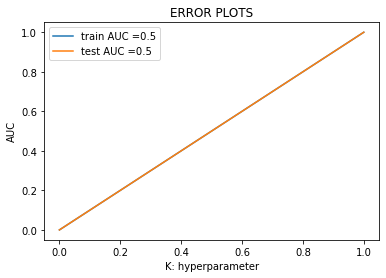

Train confusion matrix
[[332   0]
 [338   0]]
Test confusion matrix
[[158   0]
 [172   0]]


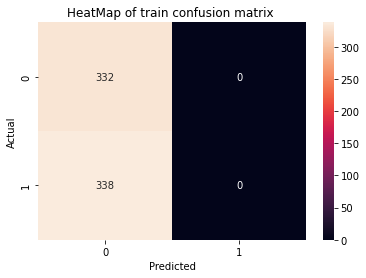

***********************************
model=LogisticRegression(C=0.001, penalty='l1', solver='liblinear')


accuracy = 0.47878787878787876
f1 score=0.0
Precission=0.0
Recall=0.0


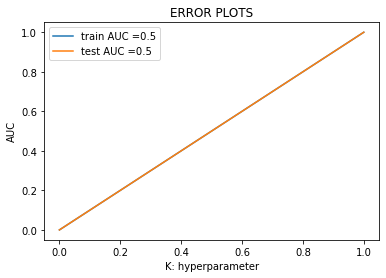

Train confusion matrix
[[332   0]
 [338   0]]
Test confusion matrix
[[158   0]
 [172   0]]


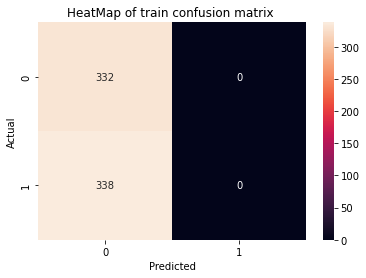

***********************************
model=LogisticRegression(C=0.01, penalty='l1', solver='liblinear')


accuracy = 0.47878787878787876
f1 score=0.0
Precission=0.0
Recall=0.0


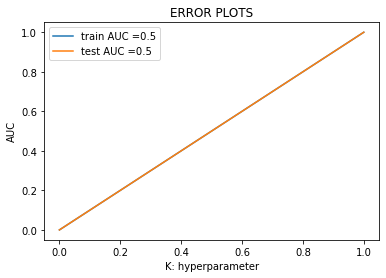

Train confusion matrix
[[332   0]
 [338   0]]
Test confusion matrix
[[158   0]
 [172   0]]


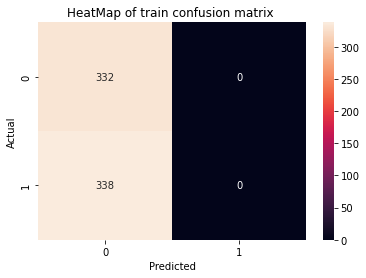

***********************************
model=LogisticRegression(C=0.1, penalty='l1', solver='liblinear')


accuracy = 0.6333333333333333
f1 score=0.5980066445182726
Precission=0.6976744186046512
Recall=0.5232558139534884


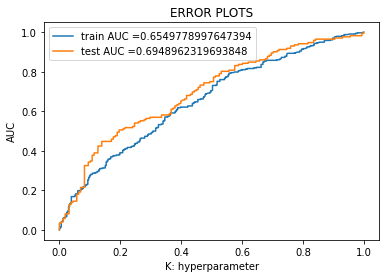

Train confusion matrix
[[231 101]
 [172 166]]
Test confusion matrix
[[119  39]
 [ 82  90]]


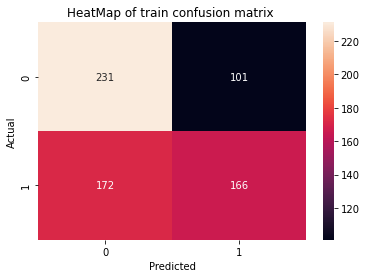

***********************************
model=LogisticRegression(C=1, penalty='l1', solver='liblinear')


accuracy = 0.5696969696969697
f1 score=0.702928870292887
Precission=0.5490196078431373
Recall=0.9767441860465116


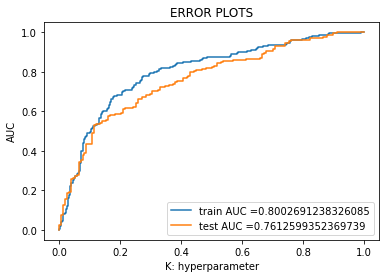

Train confusion matrix
[[264  68]
 [107 231]]
Test confusion matrix
[[ 20 138]
 [  4 168]]


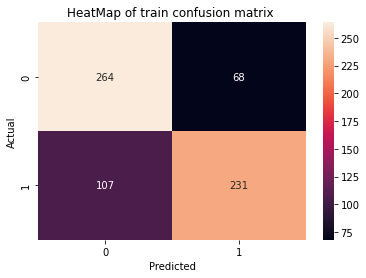

***********************************
model=LogisticRegression(C=10, penalty='l1', solver='liblinear')


accuracy = 0.5333333333333333
f1 score=0.6907630522088353
Precission=0.5276073619631901
Recall=1.0


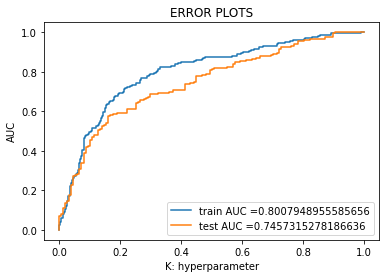

Train confusion matrix
[[268  64]
 [105 233]]
Test confusion matrix
[[  4 154]
 [  0 172]]


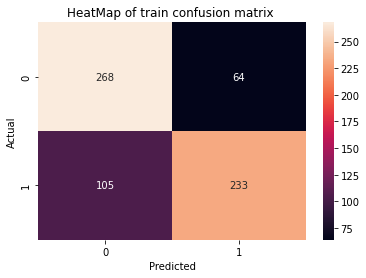

***********************************
model=LogisticRegression(C=100, penalty='l1', solver='liblinear')


accuracy = 0.5242424242424243
f1 score=0.686626746506986
Precission=0.5227963525835866
Recall=1.0


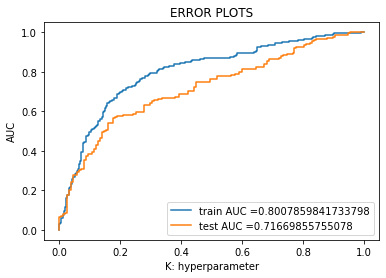

Train confusion matrix
[[267  65]
 [104 234]]
Test confusion matrix
[[  1 157]
 [  0 172]]


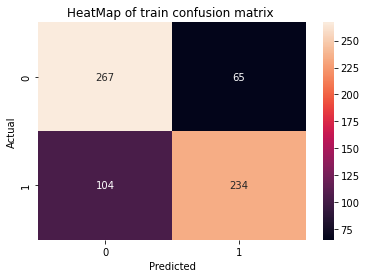

***********************************
model=LogisticRegression(C=1000, penalty='l1', solver='liblinear')


accuracy = 0.5212121212121212
f1 score=0.6852589641434264
Precission=0.5212121212121212
Recall=1.0


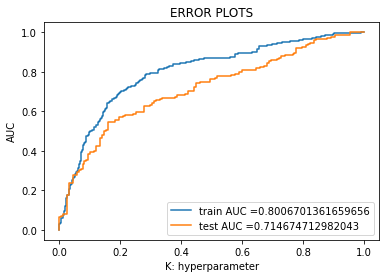

Train confusion matrix
[[267  65]
 [104 234]]
Test confusion matrix
[[  0 158]
 [  0 172]]


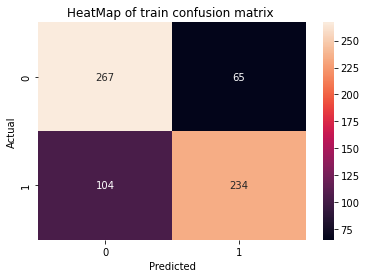

***********************************
model=LogisticRegression(C=10000, penalty='l1', solver='liblinear')


accuracy = 0.5212121212121212
f1 score=0.6852589641434264
Precission=0.5212121212121212
Recall=1.0


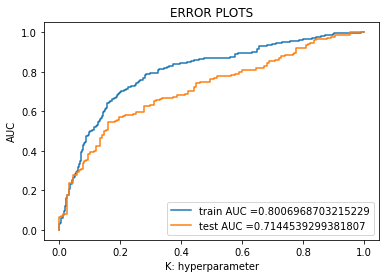

Train confusion matrix
[[267  65]
 [104 234]]
Test confusion matrix
[[  0 158]
 [  0 172]]


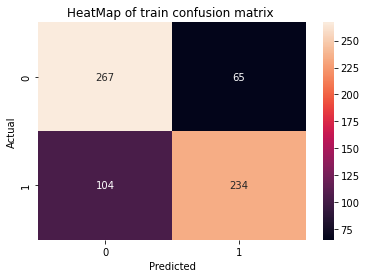

***********************************


In [51]:
Cs=[0.0001, 0.001, 0.01, 0.1, 1, 10, 100,1000,10000]
for c in Cs:
    lr = LogisticRegression(penalty='l1',solver='liblinear',C=c)
    lr.fit(X_train_c_minmax, y_train_c)
    ypred=lr.predict(X_test_c_minmax)
    print("model={}".format(lr))
    print("\n")
    print("accuracy = {}".format(accuracy_score(y_test_c, ypred)))
    print("f1 score={}".format(f1_score(y_test_c, ypred)))
    print("Precission={}".format(precision_score(y_test_c, ypred)))
    print("Recall={}".format(recall_score(y_test_c, ypred)))
        
    train_fpr, train_tpr, thresholds = roc_curve(y_train_c,lr.predict_proba(X_train_c_minmax)[:,1])
    test_fpr, test_tpr, thresholds = roc_curve(y_test_c,lr.predict_proba(X_test_c_minmax)[:,1])

    plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
    plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
    plt.legend()
    plt.xlabel("K: hyperparameter")
    plt.ylabel("AUC")
    plt.title("ERROR PLOTS")
    plt.show()

    print("Train confusion matrix")
    x=confusion_matrix(y_train_c, lr.predict(X_train_c_minmax))
    y=confusion_matrix(y_test_c, lr.predict(X_test_c_minmax))
    print(x)
    print("Test confusion matrix")
    print(y)
    ax = plt.axes()
    sns.heatmap(x, ax = ax,annot=True, fmt="d")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    ax.set_title("HeatMap of train confusion matrix ")
    plt.show()
    print("***********************************")
    


### minmax scaled l2 Reg Logistic Regression

model=LogisticRegression(C=0.0001)


accuracy = 0.5212121212121212
f1 score=0.6852589641434264
Precission=0.5212121212121212
Recall=1.0


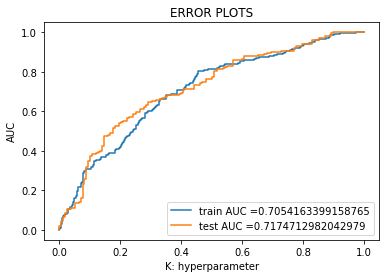

Train confusion matrix
[[  0 332]
 [  0 338]]
Test confusion matrix
[[  0 158]
 [  0 172]]


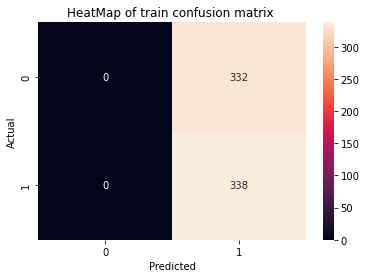

***********************************
model=LogisticRegression(C=0.001)


accuracy = 0.5363636363636364
f1 score=0.6921529175050302
Precission=0.5292307692307693
Recall=1.0


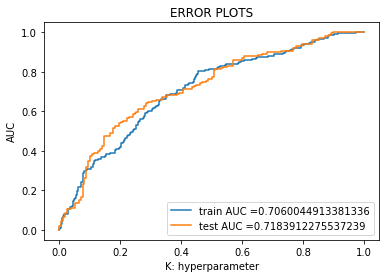

Train confusion matrix
[[ 19 313]
 [  1 337]]
Test confusion matrix
[[  5 153]
 [  0 172]]


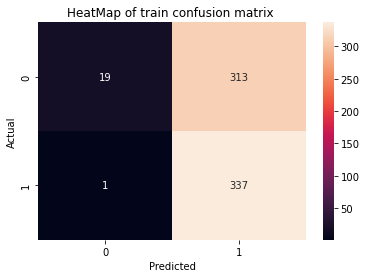

***********************************
model=LogisticRegression(C=0.01)


accuracy = 0.6424242424242425
f1 score=0.6827956989247311
Precission=0.635
Recall=0.7383720930232558


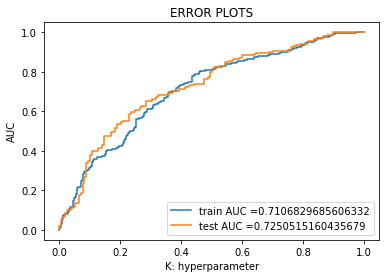

Train confusion matrix
[[231 101]
 [130 208]]
Test confusion matrix
[[ 85  73]
 [ 45 127]]


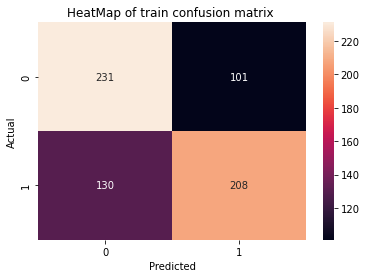

***********************************
model=LogisticRegression(C=0.1)


accuracy = 0.6787878787878788
f1 score=0.7401960784313725
Precission=0.6398305084745762
Recall=0.877906976744186


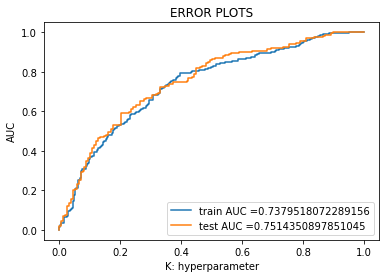

Train confusion matrix
[[238  94]
 [128 210]]
Test confusion matrix
[[ 73  85]
 [ 21 151]]


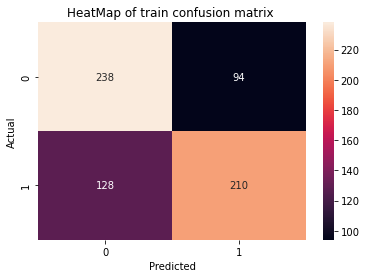

***********************************
model=LogisticRegression(C=1)


accuracy = 0.5909090909090909
f1 score=0.7145877378435518
Precission=0.5614617940199336
Recall=0.9825581395348837


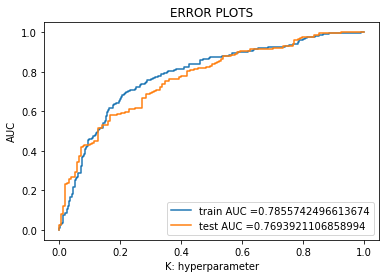

Train confusion matrix
[[259  73]
 [103 235]]
Test confusion matrix
[[ 26 132]
 [  3 169]]


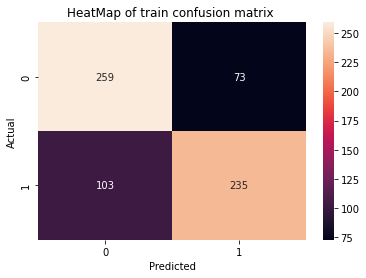

***********************************
model=LogisticRegression(C=10)


accuracy = 0.5424242424242425
f1 score=0.694949494949495
Precission=0.5325077399380805
Recall=1.0


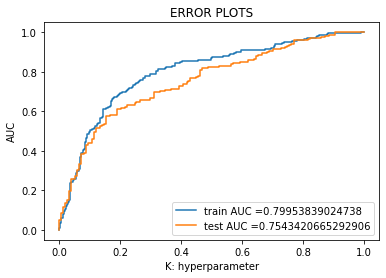

Train confusion matrix
[[266  66]
 [105 233]]
Test confusion matrix
[[  7 151]
 [  0 172]]


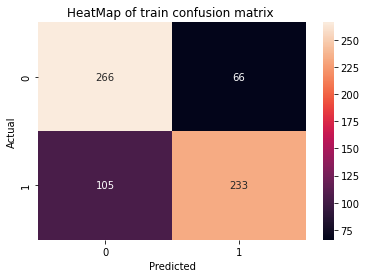

***********************************
model=LogisticRegression(C=100)


accuracy = 0.5333333333333333
f1 score=0.6907630522088353
Precission=0.5276073619631901
Recall=1.0


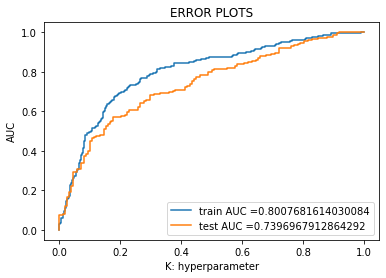

Train confusion matrix
[[268  64]
 [106 232]]
Test confusion matrix
[[  4 154]
 [  0 172]]


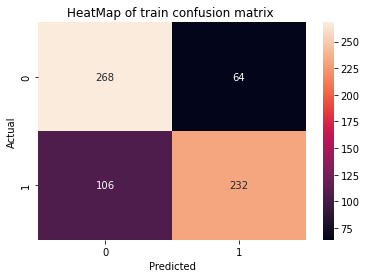

***********************************
model=LogisticRegression(C=1000)


accuracy = 0.5242424242424243
f1 score=0.686626746506986
Precission=0.5227963525835866
Recall=1.0


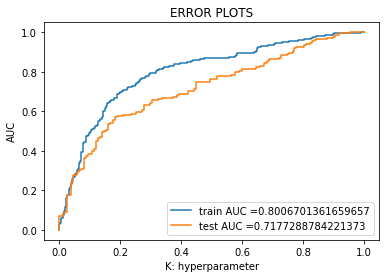

Train confusion matrix
[[267  65]
 [104 234]]
Test confusion matrix
[[  1 157]
 [  0 172]]


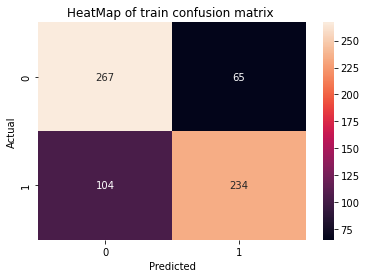

***********************************
model=LogisticRegression(C=10000)


accuracy = 0.5212121212121212
f1 score=0.6852589641434264
Precission=0.5212121212121212
Recall=1.0


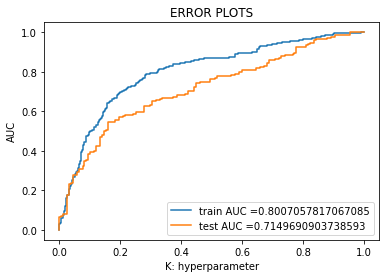

Train confusion matrix
[[267  65]
 [104 234]]
Test confusion matrix
[[  0 158]
 [  0 172]]


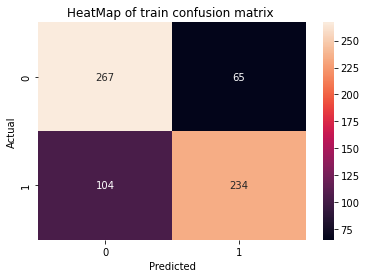

***********************************


In [52]:
Cs=[0.0001, 0.001, 0.01, 0.1, 1, 10, 100,1000,10000]
for c in Cs:
    lr = LogisticRegression(penalty='l2',C=c)
    lr.fit(X_train_c_minmax, y_train_c)
    ypred=lr.predict(X_test_c_minmax)
    print("model={}".format(lr))
    print("\n")
    print("accuracy = {}".format(accuracy_score(y_test_c, ypred)))
    print("f1 score={}".format(f1_score(y_test_c, ypred)))
    print("Precission={}".format(precision_score(y_test_c, ypred)))
    print("Recall={}".format(recall_score(y_test_c, ypred)))
        
    train_fpr, train_tpr, thresholds = roc_curve(y_train_c,lr.predict_proba(X_train_c_minmax)[:,1])
    test_fpr, test_tpr, thresholds = roc_curve(y_test_c,lr.predict_proba(X_test_c_minmax)[:,1])

    plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
    plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
    plt.legend()
    plt.xlabel("K: hyperparameter")
    plt.ylabel("AUC")
    plt.title("ERROR PLOTS")
    plt.show()

    print("Train confusion matrix")
    x=confusion_matrix(y_train_c, lr.predict(X_train_c_minmax))
    y=confusion_matrix(y_test_c, lr.predict(X_test_c_minmax))
    print(x)
    print("Test confusion matrix")
    print(y)
    ax = plt.axes()
    sns.heatmap(x, ax = ax,annot=True, fmt="d")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    ax.set_title("HeatMap of train confusion matrix ")
    plt.show()
    print("***********************************")
    


### Std scaled SVC rbf kernel

model=SVC(C=0.0001, probability=True)


accuracy = 0.5212121212121212
f1 score=0.6852589641434264
Precission=0.5212121212121212
Recall=1.0


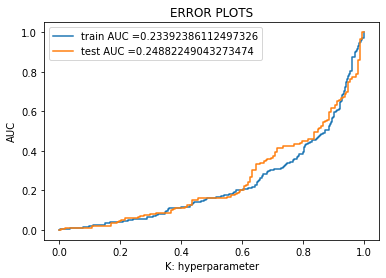

Train confusion matrix
[[  0 332]
 [  0 338]]
Test confusion matrix
[[  0 158]
 [  0 172]]


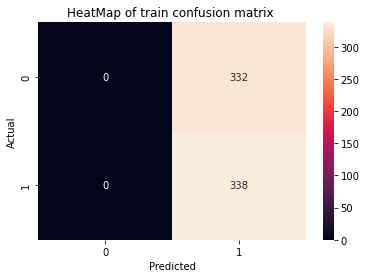

***********************************
model=SVC(C=0.001, probability=True)


accuracy = 0.5212121212121212
f1 score=0.6852589641434264
Precission=0.5212121212121212
Recall=1.0


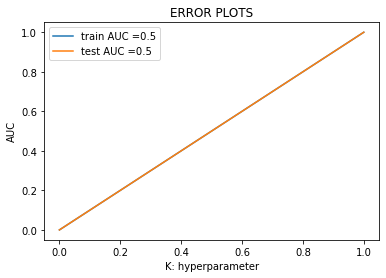

Train confusion matrix
[[  0 332]
 [  0 338]]
Test confusion matrix
[[  0 158]
 [  0 172]]


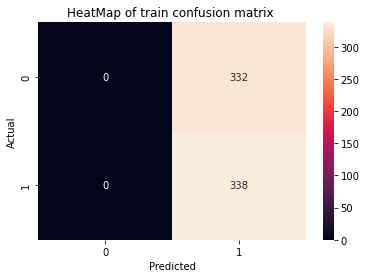

***********************************
model=SVC(C=0.01, probability=True)


accuracy = 0.5212121212121212
f1 score=0.6852589641434264
Precission=0.5212121212121212
Recall=1.0


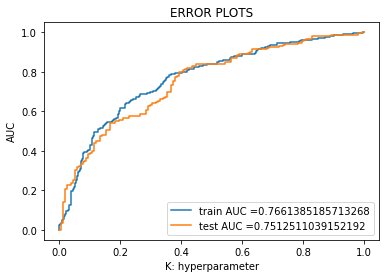

Train confusion matrix
[[  0 332]
 [  0 338]]
Test confusion matrix
[[  0 158]
 [  0 172]]


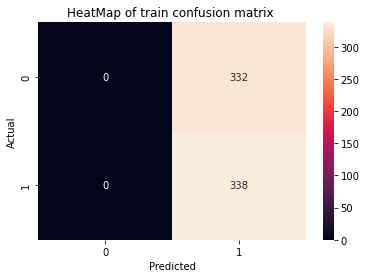

***********************************
model=SVC(C=0.1, probability=True)


accuracy = 0.6878787878787879
f1 score=0.7048710601719198
Precission=0.6949152542372882
Recall=0.7151162790697675


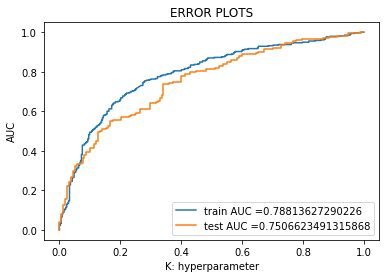

Train confusion matrix
[[240  92]
 [ 86 252]]
Test confusion matrix
[[104  54]
 [ 49 123]]


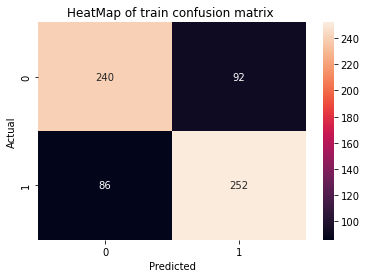

***********************************
model=SVC(C=1, probability=True)


accuracy = 0.6909090909090909
f1 score=0.6982248520710059
Precission=0.7108433734939759
Recall=0.686046511627907


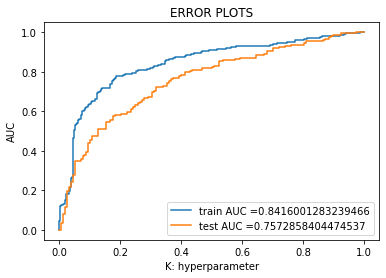

Train confusion matrix
[[275  57]
 [ 84 254]]
Test confusion matrix
[[110  48]
 [ 54 118]]


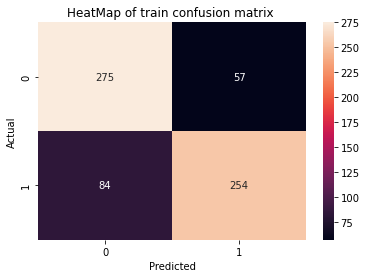

***********************************
model=SVC(C=10, probability=True)


accuracy = 0.6606060606060606
f1 score=0.6646706586826348
Precission=0.6851851851851852
Recall=0.6453488372093024


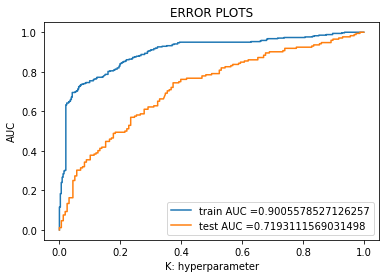

Train confusion matrix
[[288  44]
 [ 77 261]]
Test confusion matrix
[[107  51]
 [ 61 111]]


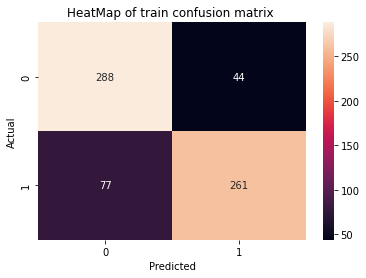

***********************************
model=SVC(C=100, probability=True)


accuracy = 0.5909090909090909
f1 score=0.5945945945945946
Precission=0.6149068322981367
Recall=0.5755813953488372


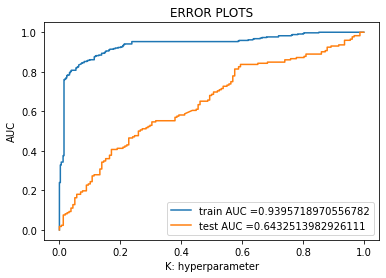

Train confusion matrix
[[313  19]
 [ 61 277]]
Test confusion matrix
[[96 62]
 [73 99]]


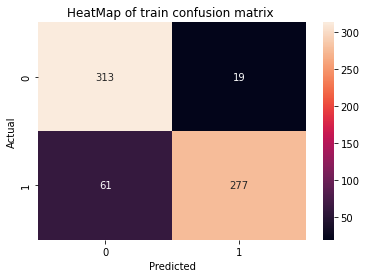

***********************************
model=SVC(C=1000, probability=True)


accuracy = 0.5363636363636364
f1 score=0.5111821086261981
Precission=0.5673758865248227
Recall=0.46511627906976744


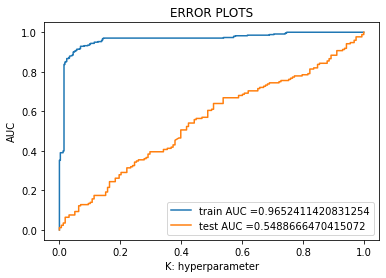

Train confusion matrix
[[320  12]
 [ 40 298]]
Test confusion matrix
[[97 61]
 [92 80]]


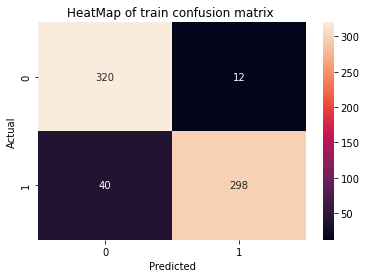

***********************************
model=SVC(C=10000, probability=True)


accuracy = 0.5363636363636364
f1 score=0.5263157894736842
Precission=0.5629139072847682
Recall=0.4941860465116279


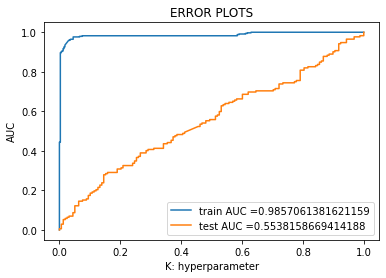

Train confusion matrix
[[325   7]
 [ 20 318]]
Test confusion matrix
[[92 66]
 [87 85]]


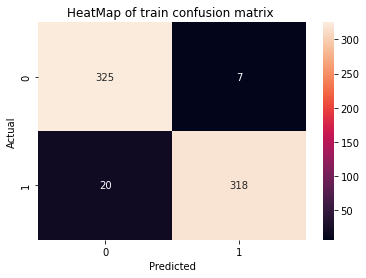

***********************************


In [53]:
Cs=[0.0001, 0.001, 0.01, 0.1, 1, 10, 100,1000,10000]
for c in Cs:
    lr = svm.SVC(C=c,kernel='rbf',probability=True)
    lr.fit(X_train_c_std, y_train_c)
    ypred=lr.predict(X_test_c_std)
    print("model={}".format(lr))
    print("\n")
    print("accuracy = {}".format(accuracy_score(y_test_c, ypred)))
    print("f1 score={}".format(f1_score(y_test_c, ypred)))
    print("Precission={}".format(precision_score(y_test_c, ypred)))
    print("Recall={}".format(recall_score(y_test_c, ypred)))
        
    train_fpr, train_tpr, thresholds = roc_curve(y_train_c,lr.predict_proba(X_train_c_std)[:,1])
    test_fpr, test_tpr, thresholds = roc_curve(y_test_c,lr.predict_proba(X_test_c_std)[:,1])

    plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
    plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
    plt.legend()
    plt.xlabel("K: hyperparameter")
    plt.ylabel("AUC")
    plt.title("ERROR PLOTS")
    plt.show()

    print("Train confusion matrix")
    x=confusion_matrix(y_train_c, lr.predict(X_train_c_std))
    y=confusion_matrix(y_test_c, lr.predict(X_test_c_std))
    print(x)
    print("Test confusion matrix")
    print(y)
    ax = plt.axes()
    sns.heatmap(x, ax = ax,annot=True, fmt="d")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    ax.set_title("HeatMap of train confusion matrix ")
    plt.show()
    print("***********************************")
    


### minmax scaled SVC rbf kernel

model=SVC(C=0.0001, probability=True)


accuracy = 0.5212121212121212
f1 score=0.6852589641434264
Precission=0.5212121212121212
Recall=1.0


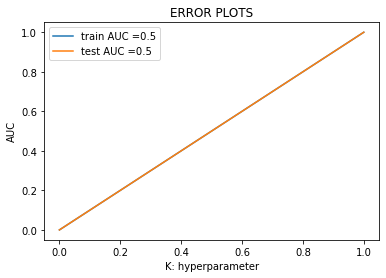

Train confusion matrix
[[  0 332]
 [  0 338]]
Test confusion matrix
[[  0 158]
 [  0 172]]


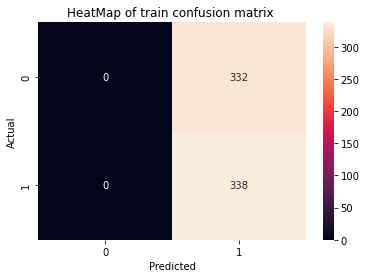

***********************************
model=SVC(C=0.001, probability=True)


accuracy = 0.5212121212121212
f1 score=0.6852589641434264
Precission=0.5212121212121212
Recall=1.0


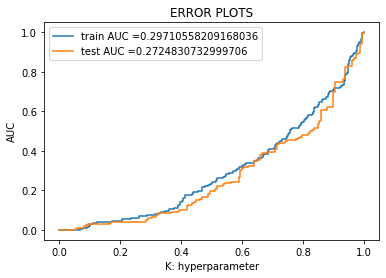

Train confusion matrix
[[  0 332]
 [  0 338]]
Test confusion matrix
[[  0 158]
 [  0 172]]


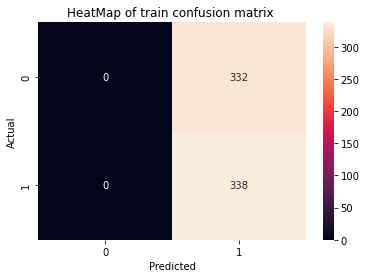

***********************************
model=SVC(C=0.01, probability=True)


accuracy = 0.5212121212121212
f1 score=0.6852589641434264
Precission=0.5212121212121212
Recall=1.0


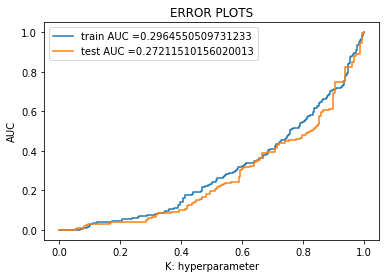

Train confusion matrix
[[  0 332]
 [  0 338]]
Test confusion matrix
[[  0 158]
 [  0 172]]


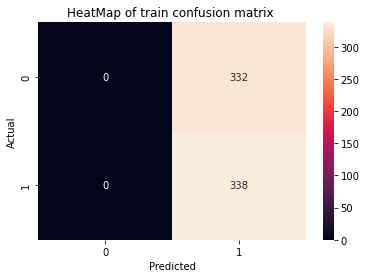

***********************************
model=SVC(C=0.1, probability=True)


accuracy = 0.6272727272727273
f1 score=0.6854219948849104
Precission=0.6118721461187214
Recall=0.7790697674418605


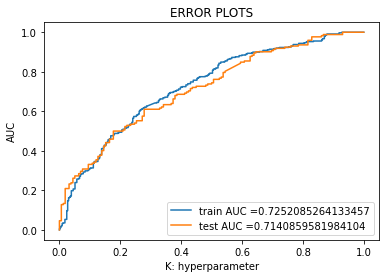

Train confusion matrix
[[241  91]
 [130 208]]
Test confusion matrix
[[ 73  85]
 [ 38 134]]


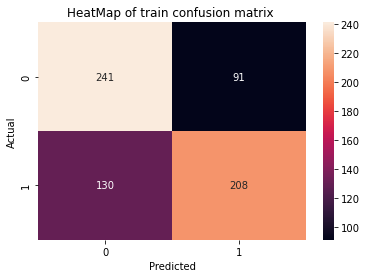

***********************************
model=SVC(C=1, probability=True)


accuracy = 0.603030303030303
f1 score=0.7069351230425056
Precission=0.5745454545454546
Recall=0.9186046511627907


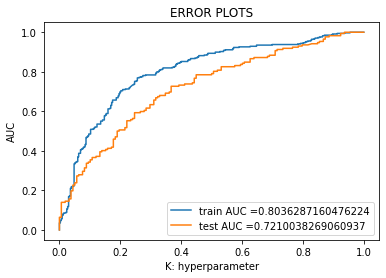

Train confusion matrix
[[263  69]
 [ 99 239]]
Test confusion matrix
[[ 41 117]
 [ 14 158]]


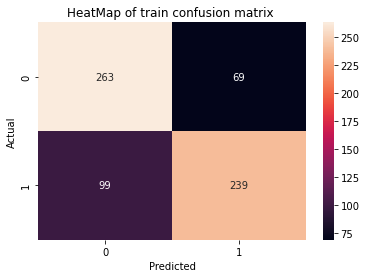

***********************************
model=SVC(C=10, probability=True)


accuracy = 0.5636363636363636
f1 score=0.685589519650655
Precission=0.548951048951049
Recall=0.9127906976744186


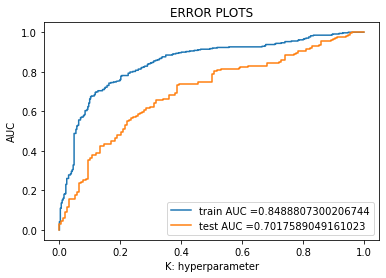

Train confusion matrix
[[277  55]
 [ 87 251]]
Test confusion matrix
[[ 29 129]
 [ 15 157]]


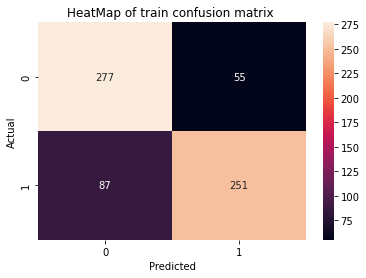

***********************************
model=SVC(C=100, probability=True)


accuracy = 0.5848484848484848
f1 score=0.6698795180722892
Precission=0.5720164609053497
Recall=0.8081395348837209


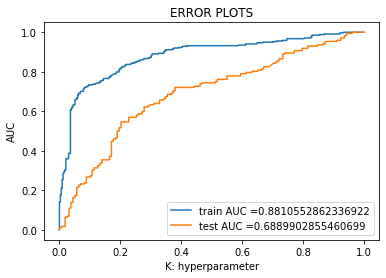

Train confusion matrix
[[279  53]
 [ 79 259]]
Test confusion matrix
[[ 54 104]
 [ 33 139]]


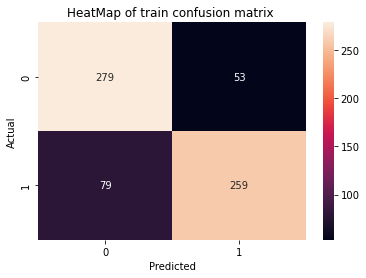

***********************************
model=SVC(C=1000, probability=True)


accuracy = 0.603030303030303
f1 score=0.5435540069686411
Precission=0.6782608695652174
Recall=0.45348837209302323


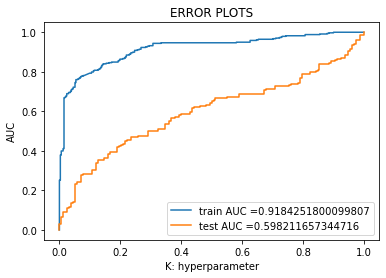

Train confusion matrix
[[300  32]
 [ 70 268]]
Test confusion matrix
[[121  37]
 [ 94  78]]


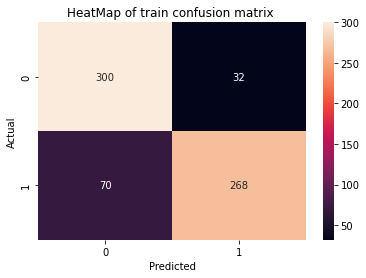

***********************************
model=SVC(C=10000, probability=True)


accuracy = 0.5757575757575758
f1 score=0.5512820512820513
Precission=0.6142857142857143
Recall=0.5


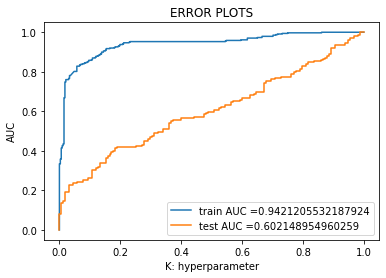

Train confusion matrix
[[313  19]
 [ 59 279]]
Test confusion matrix
[[104  54]
 [ 86  86]]


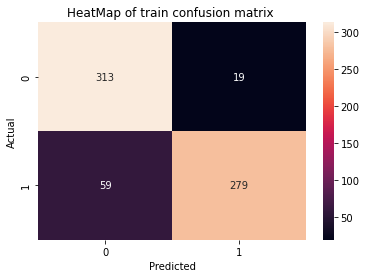

***********************************


In [54]:
Cs=[0.0001, 0.001, 0.01, 0.1, 1, 10, 100,1000,10000]
for c in Cs:
    lr = lr = svm.SVC(C=c,kernel='rbf',probability=True)
    lr.fit(X_train_c_minmax, y_train_c)
    ypred=lr.predict(X_test_c_minmax)
    print("model={}".format(lr))
    print("\n")
    print("accuracy = {}".format(accuracy_score(y_test_c, ypred)))
    print("f1 score={}".format(f1_score(y_test_c, ypred)))
    print("Precission={}".format(precision_score(y_test_c, ypred)))
    print("Recall={}".format(recall_score(y_test_c, ypred)))
        
    train_fpr, train_tpr, thresholds = roc_curve(y_train_c,lr.predict_proba(X_train_c_minmax)[:,1])
    test_fpr, test_tpr, thresholds = roc_curve(y_test_c,lr.predict_proba(X_test_c_minmax)[:,1])

    plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
    plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
    plt.legend()
    plt.xlabel("K: hyperparameter")
    plt.ylabel("AUC")
    plt.title("ERROR PLOTS")
    plt.show()

    print("Train confusion matrix")
    x=confusion_matrix(y_train_c, lr.predict(X_train_c_minmax))
    y=confusion_matrix(y_test_c, lr.predict(X_test_c_minmax))
    print(x)
    print("Test confusion matrix")
    print(y)
    ax = plt.axes()
    sns.heatmap(x, ax = ax,annot=True, fmt="d")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    ax.set_title("HeatMap of train confusion matrix ")
    plt.show()
    print("***********************************")
    


In [ ]:
### linear regression 

In [99]:
X_train_c_minmax.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,0.675761,0.0,0.623529,0.313131,0.534314,0.037736,0.0,0.0,0.0,0.0,1.0
1,0.426061,0.0,0.552941,0.262626,0.485294,0.028302,0.0,0.0,0.0,0.0,1.0
2,0.731092,0.0,0.505882,0.292929,0.681373,0.037736,0.5,0.0,0.0,0.0,1.0
3,0.583106,1.0,0.776471,0.494949,0.534314,0.037736,0.0,0.0,0.0,0.0,1.0
4,0.016370,0.0,0.564706,0.393939,0.436275,0.018868,0.0,0.0,0.0,0.0,1.0


In [58]:
lr = LinearRegression()
lr.fit(X_train_c_minmax, y_train_c)
ypred=lr.predict(X_test_c_minmax)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_c, ypred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_c, ypred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_c, ypred)))

Mean Absolute Error: 0.44819482444777936
Mean Squared Error: 0.28964763836432483
Root Mean Squared Error: 0.5381892217095441


In [ ]:
lr = LinearRegression()
lr.fit(X_train_c_minmax, y_train_c)
ypred=lr.predict(X_test_c_minmax)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_c, ypred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_c, ypred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_c, ypred)))

In [95]:
y_train_c.value_counts()

1    338
0    332
Name: cardio, dtype: int64

In [63]:
y_pred=pd.Series(ypred,index=None)

In [64]:
y_pred.value_counts()

1.055051    1
1.185393    1
0.807218    1
0.754098    1
0.723504    1
           ..
0.836917    1
0.853537    1
1.085506    1
1.007655    1
0.690886    1
Length: 330, dtype: int64

In [67]:
max(y_pred)

1.7125607764605113

In [83]:
y_pred_clas=y_pred

In [75]:
def return_class(n):
    if n<tol:
        return 0
    if n>tol:
        return 1


In [86]:
lst=[0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
for ele in lst:
    tol=ele
    print("tol={}".format(tol))
    print("accuracy = {}".format(accuracy_score(y_test_c, y_pred_clas.map(return_class))))

tol=0.3
accuracy = 0.5333333333333333
tol=0.4
accuracy = 0.5393939393939394
tol=0.5
accuracy = 0.5666666666666667
tol=0.6
accuracy = 0.6060606060606061
tol=0.7
accuracy = 0.6696969696969697
tol=0.8
accuracy = 0.6848484848484848
tol=0.9
accuracy = 0.6757575757575758
tol=1.0
accuracy = 0.6303030303030303


In [87]:
tol=0.9
y_pred_clas=y_pred_clas.map(return_class)

In [88]:
y_pred_clas.value_counts()

0    225
1    105
dtype: int64

In [91]:
print("accuracy = {}".format(accuracy_score(y_test_c, y_pred_clas)))
print("f1 score={}".format(f1_score(y_test_c, y_pred_clas)))
print("Precission={}".format(precision_score(y_test_c, y_pred_clas)))
print("Recall={}".format(recall_score(y_test_c, y_pred_clas)))

accuracy = 0.6757575757575758
f1 score=0.6137184115523466
Precission=0.8095238095238095
Recall=0.4941860465116279


### We can see overall improvrment in all the metrics is improved 
### we can see this especially for logreg models with L1 regularization precission improves the most 
### This Might be because there is no missing values hence the variability errors and randomness introduced by imputation is not seen here like in case of TASK 1